In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import time
from tqdm import tqdm

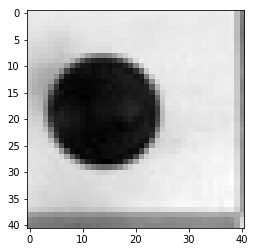

In [2]:
DATADIR = "dataset2/train"

CATEGORIES = [ "piece","board"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
training_data = []
IMG_SIZE = 40
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()
print(len(training_data))

100%|██████████| 1439/1439 [00:00<00:00, 7186.93it/s]

2968


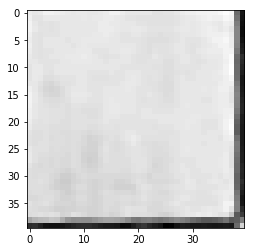

1


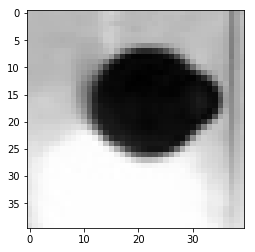

0


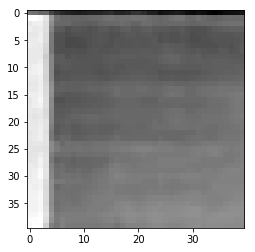

1


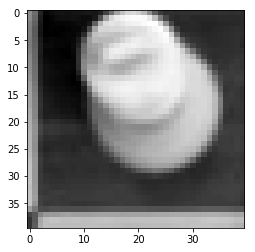

0


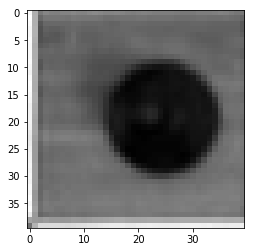

0


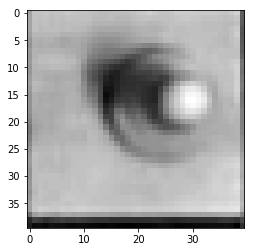

0


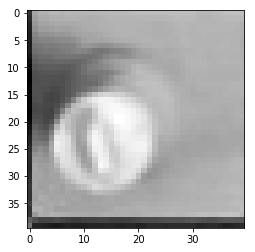

0


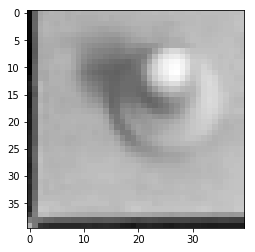

0


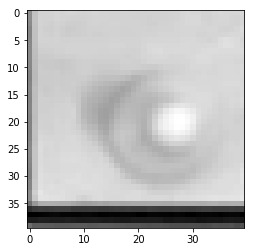

0


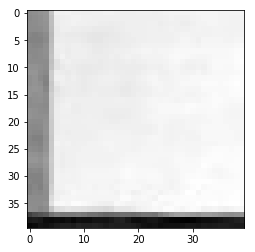

1


In [4]:

random.shuffle(training_data)
for sample in training_data[:10]:
    plt.imshow(sample[0], cmap='gray')  # graph it
    plt.show()  # display!
    print(sample[1])

In [5]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [23]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [24]:


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [6]:
X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('tanh'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('tanh'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('tanh'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])


W1030 23:39:05.659140 139719323940672 deprecation.py:506] From /home/ashish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


3-conv-64-nodes-0-dense-1572458945


W1030 23:39:05.861304 139719323940672 deprecation.py:323] From /home/ashish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2077 samples, validate on 891 samples
Epoch 1/10
2077/2077 [==============================] - 9s 4ms/sample - loss: 0.5474 - acc: 0.7294 - val_loss: 0.4172 - val_acc: 0.7452
Epoch 2/10
2077/2077 [==============================] - 8s 4ms/sample - loss: 0.2737 - acc: 0.8984 - val_loss: 0.1597 - val_acc: 0.9394
Epoch 3/10
2077/2077 [==============================] - 8s 4ms/sample - loss: 0.0937 - acc: 0.9788 - val_loss: 0.0543 - val_acc: 0.9888
Epoch 4/10
2077/2077 [==============================] - 8s 4ms/sample - loss: 0.0740 - acc: 0.9730 - val_loss: 0.0376 - val_acc: 0.9910
Epoch 5/10
2077/2077 [==============================] - 9s 4ms/sample - loss: 0.0452 - acc: 0.9894 - val_loss: 0.0302 - val_acc: 0.9910
Epoch 6/10
2077/2077 [==============================] - 8s 4ms/sample - loss: 0.0245 - acc: 0.9952 - val_loss: 0.0237 - val_acc: 0.9899
Epoch 7/10
2077/2077 [==============================] - 12s 6ms/sample - loss: 0.0310 - acc: 0.9909 - val_loss: 0.0249 - val_acc: 0.9910


In [27]:
X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('tanh'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format('Name'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=6,
          validation_split=0.3,
          callbacks=[tensorboard])

Train on 2077 samples, validate on 891 samples
Epoch 1/6
2077/2077 [==============================] - 7s 3ms/sample - loss: 0.6957 - acc: 0.5166 - val_loss: 0.6992 - val_acc: 0.4860
Epoch 2/6
2077/2077 [==============================] - 7s 3ms/sample - loss: 0.6938 - acc: 0.5132 - val_loss: 0.6953 - val_acc: 0.4860
Epoch 3/6
2077/2077 [==============================] - 7s 3ms/sample - loss: 0.6933 - acc: 0.5209 - val_loss: 0.6930 - val_acc: 0.5140
Epoch 4/6
2077/2077 [==============================] - 9s 4ms/sample - loss: 0.6940 - acc: 0.5364 - val_loss: 0.6935 - val_acc: 0.4860
Epoch 5/6
2077/2077 [==============================] - 7s 3ms/sample - loss: 0.6929 - acc: 0.5277 - val_loss: 0.6972 - val_acc: 0.4860
Epoch 6/6
2077/2077 [==============================] - 7s 4ms/sample - loss: 0.6925 - acc: 0.5277 - val_loss: 0.6951 - val_acc: 0.4860


In [8]:
model.save('model4.model')

In [9]:
def prepare(filepath):
    try:
        IMG_SIZE = 40  # 50 in txt-based
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255
    except:
        pass

In [13]:
model = tf.keras.models.load_model("model1.model")
prediction = model.predict([prepare('dataset/train/board/2.jpg')])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT


OSError: Unable to open file (unable to open file: name = 'model1.model', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [58]:
print(prediction)



[[0.65030307]]


In [11]:
i=0
z=0;o=0
folder='./dataset/train/piece'
for image in os.listdir(folder):
    
    try:
        img =os.path.join(folder,image)
        prediction = model.predict(prepare(img))
        if int(round(prediction[0][0]))==0:
            z+=1
        else:
            o+=1
#         print(CATEGORIES[int(round(prediction[0][0]))])
#         print(round(prediction[0][0]))
    except:
        pass
print(o)
print(z)
print(z/(o+z))
print(o/(o+z))
    

86
770
0.8995327102803738
0.10046728971962617


In [25]:
test_data = []
IMG_SIZE = 40


#     for category in CATEGORIES:  

path = os.path.join('dataset/train/board/')  
class_num = 0
x_test=[]
y_test=[]
for img in tqdm(os.listdir(path)):  
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#                 training_data.append([new_array, class_num])  # add this to our training_data
        x_test.append(new_array)
        y_test.append(1)
    except Exception as e:  # in the interest in keeping the output clean...
        pass
    #except OSError as e:
    #    print("OSErrroBad img most likely", e, os.path.join(path,img))
    #except Exception as e:
    #    print("general exception", e, os.path.join(path,img))

x_test=np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test=x_test/255
print(len(y_test))
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)


100%|██████████| 889/889 [00:00<00:00, 7996.19it/s]

885
128/885 [===>..........................] - ETA: 0s - loss: 0.2381 - acc: 0.9375

885/885 [==============================] - 0s 494us/sample - loss: 0.1772 - acc: 0.9492
test loss, test acc: [0.17724761667393021, 0.9491525]


In [39]:
path = os.path.join('dataset/train/board/') 
for img in tqdm(os.listdir(path)):  
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data s
        new_array=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    except:
        pass
prediction = model.predict(new_array)


100%|██████████| 889/889 [00:00<00:00, 9953.46it/s]


In [40]:
print(prediction)


[[0.]]
